In [1]:
!pip install numpy
!pip install https://github.com/phoebe-project/phoebe2/archive/refs/heads/workshop2021.zip --ignore-installed
!pip install emcee


  Using cached https://github.com/phoebe-project/phoebe2/archive/refs/heads/workshop2021.zip
  Using cached numpy-1.21.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.8 MB)
  Using cached scipy-1.7.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.4 MB)
  Using cached astropy-4.3.1-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (11.0 MB)
  Using cached corner-2.2.1-py3-none-any.whl (15 kB)
  Using cached pytest-6.2.5-py3-none-any.whl (280 kB)
  Using cached requests-2.26.0-py2.py3-none-any.whl (62 kB)
  Using cached tqdm-4.62.2-py2.py3-none-any.whl (76 kB)
  Using cached python_socketio-5.4.0-py3-none-any.whl (55 kB)
  Using cached Flask-2.0.1-py3-none-any.whl (94 kB)
  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl (14 kB)
  Using cached Flask_SocketIO-4.3.2-py2.py3-none-any.whl (15 kB)
  Using cached gevent_websocket-0.10.1-py3-none-any.whl (22 kB)
  Using cached python_socketio-4.6.1-py2.py3-none-any.whl (51 kB)
  Using cached pyerfa-2.0.0-cp38

In [ ]:
!pip install -I "phoebe>=2.3,<2.4"

In [2]:
import phoebe
from phoebe import u # units
import numpy as np

logger = phoebe.logger()

100%|██████████| 604/604 [00:45<00:00, 13.37it/s]
Tue, 07 Sep 2021 17:42 BUNDLE       WARNING overwriting model: latest


{'pblum@primary@lc01': <Quantity 1.16e+27 W>, 'pblum@secondary@lc01': <Quantity 4.89400633e+26 W>, 'pbflux@lc01': <Quantity 1.31255132e+26 W / m2>}


100%|██████████| 604/604 [00:43<00:00, 13.78it/s]


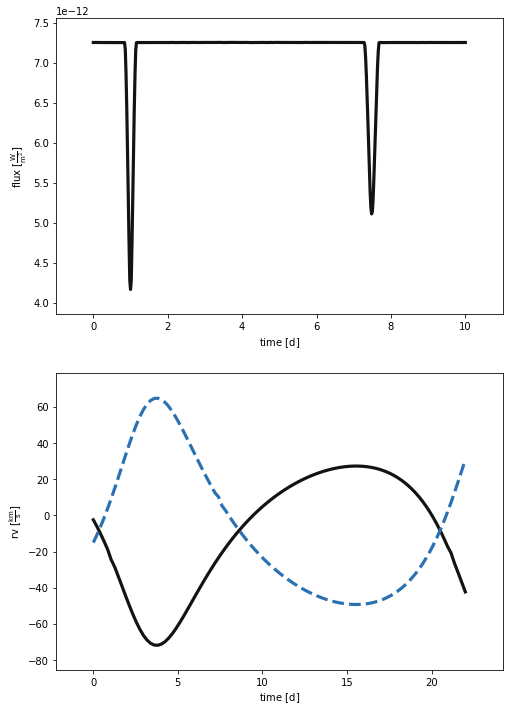

(<autofig.figure.Figure | 2 axes | 3 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [3]:
b = phoebe.default_binary()

#setting basic params
b.set_value_all('teff@primary',6680)
b.set_value_all('teff@secondary',6200)
b.set_value_all('requiv@primary',1.305)
b.set_value_all('requiv@secondary',0.99)
b.set_value_all('period@binary',20.1784)
b.set_value_all('sma@binary',40.46)

#using Johnson:V band results for setting further params
b.set_value_all('incl@binary',89.535)
b.set_value_all('q',0.8688)
b.set_value_all('t0_supconj',1)
b.set_value_all('ecc',0.31)
b.set_value_all('per0',155.5)
b.set_value_all('vgamma',-8.315)

#coomputing times and adding datasets
lctimes=phoebe.linspace(0,10,501)
rvtimes=phoebe.linspace(0,22,105)
b.add_dataset('lc',compute_times=lctimes)
b.add_dataset('rv',compute_times=rvtimes)

#setting photometric params
b.set_value_all('passband','Johnson:V')
b.set_value_all('ld_mode','manual')
b.set_value_all('ld_func','linear')
b.set_value_all('ld_coeffs@primary',[0.33])
b.set_value_all('ld_coeffs@secondary',[0.32])
b.set_value_all('distance',137.8*u.pc)

#running initial compute
b.run_compute(irrad_method='horvat')

#setting luminosity values and computing the model again
b.set_value_all('pblum@primary@lc01',1.16e+27)
print(b.compute_pblums(dataset='lc01',pbflux=True))
b.run_compute(irrad_method='horvat')

#getting dataset from the computed model
fluxes=b.get_value('fluxes@model')+np.random.normal(size=lctimes.shape)*0.01
fsigmas=np.ones_like(lctimes)*0.02

rvsA=b.get_value('rvs@primary@model')+np.random.normal(size=rvtimes.shape)*10
rvsB=b.get_value('rvs@secondary@model')+np.random.normal(size=rvtimes.shape)*10
rvsigmas=np.ones_like(rvtimes)*20

b.plot(show=True)

In [4]:
b = phoebe.default_binary()

b.set_value('latex_repr', component='binary', value='orb')
b.set_value('latex_repr', component='primary', value='1')
b.set_value('latex_repr', component='secondary', value='2')

b.add_dataset('lc', 
              compute_phases=phoebe.linspace(0,1,604),
              times=lctimes, 
              fluxes=fluxes, 
              sigmas=fsigmas, 
              dataset='lc01')

b.add_dataset('rv', 
              compute_phases=phoebe.linspace(0,1,604),
              times=rvtimes, 
              rvs={'primary': rvsA, 'secondary': rvsB}, 
              sigmas=rvsigmas, 
              dataset='rv01')

b.set_value_all('ld_mode','manual')

## LC

In [9]:
b.add_solver('estimator.lc_geometry', solver='lc_geom01', lc_datasets='lc01', overwrite=True)

<ParameterSet: 9 parameters | qualifiers: orbit, lc_datasets, t0_near_times, expose_model, lc_combine, phase_nbins, use_server, comments, phase_bin>

In [10]:
b.run_solver(solver='lc_geom01', kind='lc_geometry', solution='lc_geom_sol')

Tue, 07 Sep 2021 17:43 SOLVER       WARNING binning input observations (len: 501) with 500 bins (ignores sigmas)
Tue, 07 Sep 2021 17:43 SOLVER       WARNING phase-binning resulted in bin(s) with <=1 entries, ignoring sigmas as cannot determine per-bin sigmas.
Tue, 07 Sep 2021 17:43 SOLVER       WARNING 2G model CG12 failed with error: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Tue, 07 Sep 2021 17:43 SOLVER       WARNING 2G model CG12E1 failed with error: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Tue, 07 Sep 2021 17:43 SOLVER       WARNING 2G model CG12E2 failed with error: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Tue, 07 Sep 2021 17:43 SOLVER       WARNING Cannot esimate eccentricty and argument of periastron: incomplete geometry information
/home/paarmita/anaconda3/lib/python3.8/site-packages/phoebe/parameters/parameters.py:10382: VisibleDeprecationWarnin

<ParameterSet: 21 parameters | qualifiers: primary_depth, adopt_distributions, secondary_width, primary_phase, fitted_values, input_phases, secondary_phase, secondary_depth, eclipse_edges, orbit, analytic_fluxes, analytic_best_model, adopt_values, input_fluxes, input_sigmas, comments, fitted_units, analytic_phases, fitted_twigs, adopt_parameters, primary_width>

In [11]:
print(b.adopt_solution('lc_geom_sol', trial_run=True))

ParameterSet: 3 parameters
   t0_supconj@binary@orbit@com...: 0.6365517719109761 d
       ecc@binary@orbit@component: 0.0
      per0@binary@orbit@component: 90.0 deg


/home/paarmita/anaconda3/lib/python3.8/site-packages/phoebe/dependencies/autofig/call.py:1097: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([x, y])
/home/paarmita/anaconda3/lib/python3.8/site-packages/phoebe/dependencies/autofig/call.py:1098: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  points = np.array([x, y]).T.reshape(-1, 1, 2)


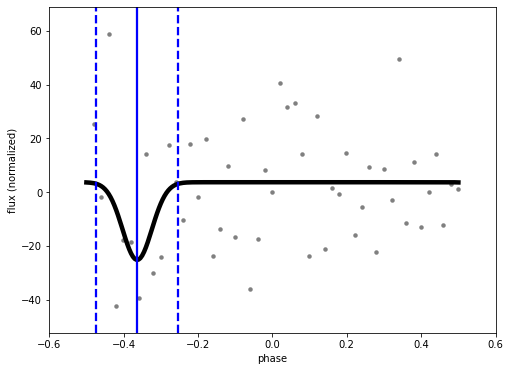

In [12]:
afig, mplfig = b.plot(solution='lc_geom_sol',
                      show=True)

In [ ]:
b.add_solver('estimator.lc_geometry', solver='lc_geom01', lc_datasets='lc01', overwrite=True)
b.run_solver(solver='lc_geom01', kind='lc_geometry', solution='lc_geom_sol')

# RV

In [5]:
b.add_solver('estimator.rv_geometry',solver='rv_geom01',rv_datasets='rv01', overwrite=True)

<ParameterSet: 7 parameters | qualifiers: orbit, expose_model, phase_nbins, use_server, comments, phase_bin, rv_datasets>

In [6]:
b.run_solver(solver='rv_geom01', kind='rv_geometry', solution='rv_geom_sol')

<ParameterSet: 17 parameters | components: secondary, primary>

In [7]:
print(b.adopt_solution('rv_geom_sol', trial_run=True))


ParameterSet: 6 parameters
   t0_supconj@binary@orbit@com...: 0.04328058364131644 d
         q@binary@orbit@component: 1.0577835552025827
     asini@binary@orbit@component: 1.2996725986763544 solRad
       ecc@binary@orbit@component: 0.8867959622691924
      per0@binary@orbit@component: 4.914532056024569e-09 deg
                    vgamma@system: -8.679426484278611 km / s


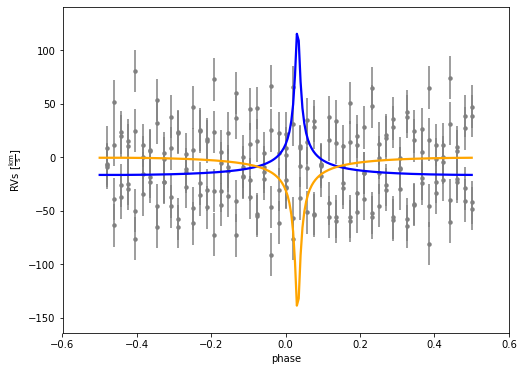

In [8]:
afig, mplfig = b.plot(solution='rv_geom_sol', show=True)

# EBAI

In [13]:
b.add_solver('estimator.ebai',solver="ebai_geom1",lc_datasets='lc01', overwrite=True)

Tue, 07 Sep 2021 17:44 BUNDLE       WARNING adding teffratio constraint to binary orbit (needed for ebai solver)
Tue, 07 Sep 2021 17:44 BUNDLE       WARNING adding requivsumfrac constraint to binary orbit (needed for ebai solver)


<ParameterSet: 7 parameters | qualifiers: orbit, lc_datasets, lc_combine, phase_nbins, use_server, comments, phase_bin>

In [14]:
b.run_solver(solver='ebai_geom1',kind='ebai',solution='ebai_sol2')

Tue, 07 Sep 2021 17:44 SOLVER       WARNING binning input observations (len: 501) with 500 bins (ignores sigmas)
Tue, 07 Sep 2021 17:44 SOLVER       WARNING phase-binning resulted in bin(s) with <=1 entries, ignoring sigmas as cannot determine per-bin sigmas.
Tue, 07 Sep 2021 17:44 SOLVER       WARNING 2G model CG12E1 failed with error: Optimal parameters not found: The maximum number of function evaluations is exceeded.
/home/paarmita/anaconda3/lib/python3.8/site-packages/phoebe/solverbackends/ebai/__init__.py:10: RuntimeWarning: overflow encountered in exp
  return 1./(1.+np.exp(-(val-theta)/tau))


<ParameterSet: 13 parameters | qualifiers: ebai_fluxes, adopt_values, orbit, input_fluxes, adopt_distributions, ebai_phases, input_sigmas, fitted_values, adopt_parameters, fitted_twigs, input_phases, comments, fitted_units>

In [15]:
print(b.adopt_solution('ebai_sol2', trial_run=True))

ParameterSet: 6 parameters
   t0_supconj@binary@orbit@com...: -0.05958000000000027 d
   teffratio@binary@orbit@comp...: 0.3564042401873844
   requivsumfrac@binary@orbit@...: 0.4393177404006376
     esinw@binary@orbit@component: -0.6094001294419193
     ecosw@binary@orbit@component: -0.17665559178765994
      incl@binary@orbit@component: 60.674177698677646 deg


/home/paarmita/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/paarmita/anaconda3/lib/python3.8/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


ValueError: zero-size array to reduction operation fmin which has no identity

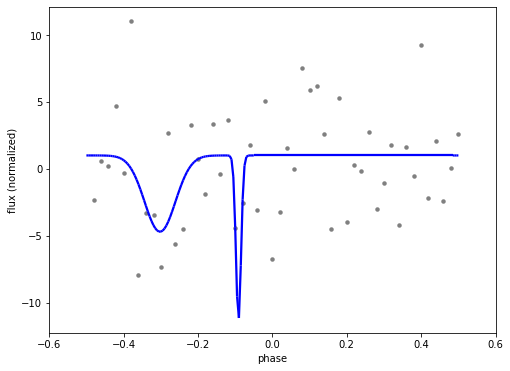

In [16]:
afig, mplfig = b.plot(solution='ebai_sol2',show=True)